In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [21]:
df= pd.read_csv("Admission_Predict.csv")

In [22]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admit_Chances
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [23]:
df.shape

(400, 9)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Admit_Chances      400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [25]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admit_Chances
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [27]:
df['Admit_Chances'].describe()

count    400.000000
mean       0.724350
std        0.142609
min        0.340000
25%        0.640000
50%        0.730000
75%        0.830000
max        0.970000
Name: Admit_Chances, dtype: float64

NUMERICAL ANALYSIS AND VISUALIZATION



In [43]:
df['Admit_Chances'].mean()

0.7243499999999996

In [44]:
df['Admit_Chances'].median()

0.73

<AxesSubplot:>

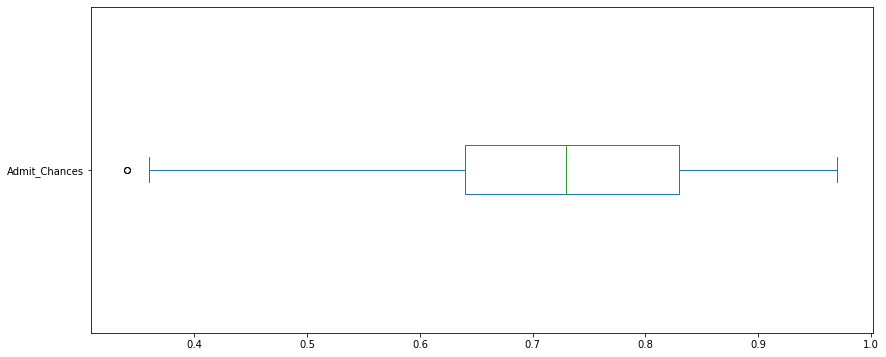

In [30]:
df['Admit_Chances'].plot(kind='box', vert=False, figsize=(14,6))


<AxesSubplot:ylabel='Density'>

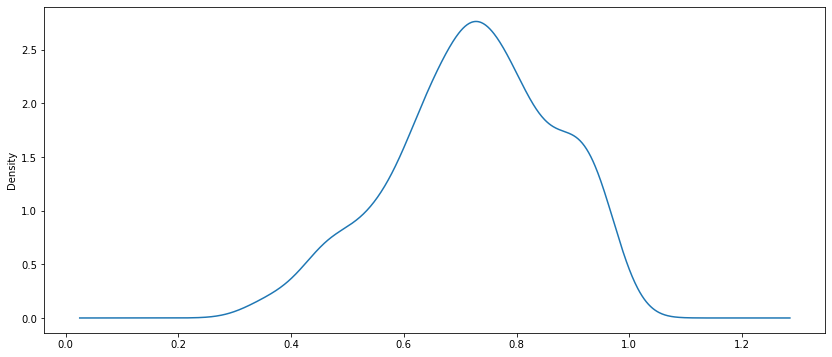

In [31]:
df['Admit_Chances'].plot(kind='density', figsize=(14,6)) # kde

Text(0, 0.5, 'GRE Score')

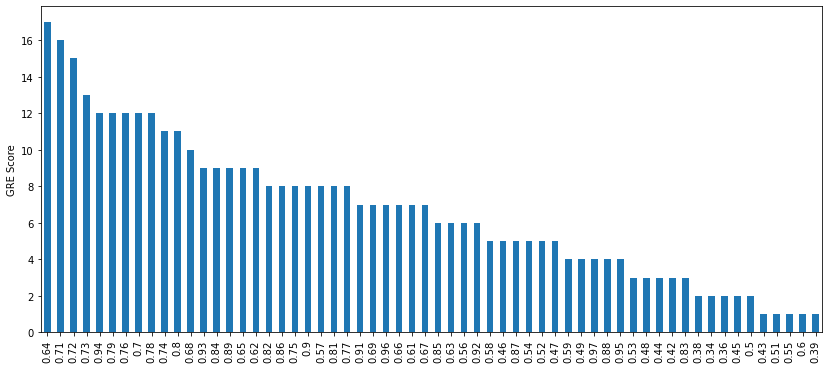

In [33]:
ax = df['Admit_Chances'].value_counts().plot(kind='bar', figsize=(14,6))
ax.set_ylabel('GRE Score')

In [34]:
df['Research'].value_counts()

1    219
0    181
Name: Research, dtype: int64

Text(0, 0.5, 'Admit_Chances')

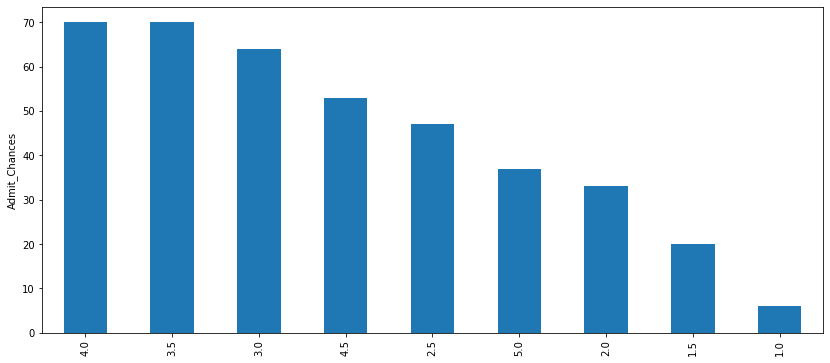

In [42]:
ax = df['SOP'].value_counts().plot(kind='bar', figsize=(14,6))
ax.set_ylabel('Admit_Chances')

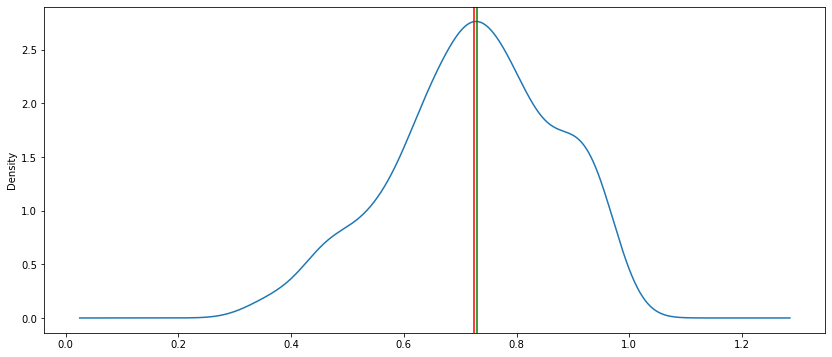

In [59]:
st = df['Admit_Chances'].plot(kind='density', figsize=(14,6)) # kde
st.axvline(df['Admit_Chances'].mean(), color='red')
st.axvline(df['Admit_Chances'].median(), color='green')

Text(0, 0.5, 'Number of Research')

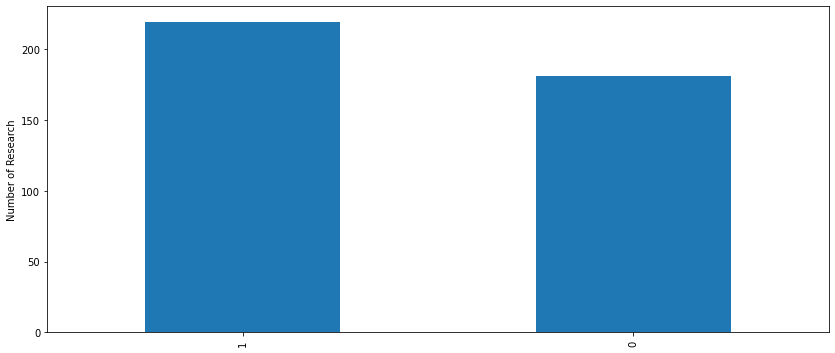

In [49]:
st = df['Research'].value_counts().plot(kind='bar', figsize=(14,6))
st.set_ylabel('Number of Research')

In [50]:
corr = df.corr()

corr


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Admit_Chances
Serial No.,1.000000,-0.097526,-0.147932,-0.169948,-0.166932,-0.088221,-0.045608,-0.063138,0.042336
GRE Score,-0.097526,1.000000,0.835977,0.668976,0.612831,0.557555,0.833060,0.580391,0.802610
TOEFL Score,-0.147932,0.835977,1.000000,0.695590,0.657981,0.567721,0.828417,0.489858,0.791594
University Rating,-0.169948,0.668976,0.695590,1.000000,0.734523,0.660123,0.746479,0.447783,0.711250
SOP,-0.166932,0.612831,0.657981,0.734523,1.000000,0.729593,0.718144,0.444029,0.675732
LOR,-0.088221,0.557555,0.567721,0.660123,0.729593,1.000000,0.670211,0.396859,0.669889
CGPA,-0.045608,0.833060,0.828417,0.746479,0.718144,0.670211,1.000000,0.521654,0.873289
Research,-0.063138,0.580391,0.489858,0.447783,0.444029,0.396859,0.521654,1.000000,0.553202
Admit_Chances,0.042336,0.802610,0.791594,0.711250,0.675732,0.669889,0.873289,0.553202,1.000000


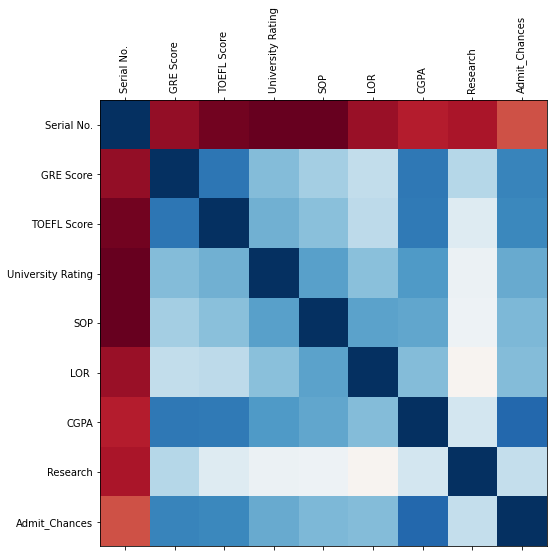

In [53]:
fig = plt.figure(figsize=(8,8))
plt.matshow(corr, cmap='RdBu', fignum=fig.number)
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical');
plt.yticks(range(len(corr.columns)), corr.columns);

<AxesSubplot:xlabel='Admit_Chances', ylabel='SOP'>

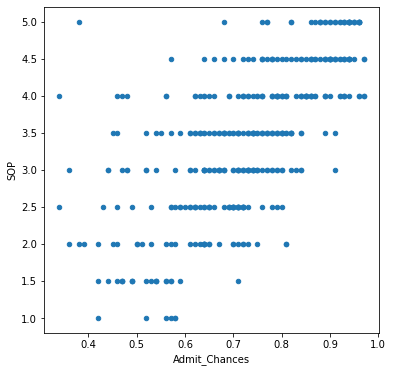

In [54]:
df.plot(kind='scatter', x='Admit_Chances', y='SOP', figsize=(6,6))

<AxesSubplot:xlabel='Admit_Chances', ylabel='GRE Score'>

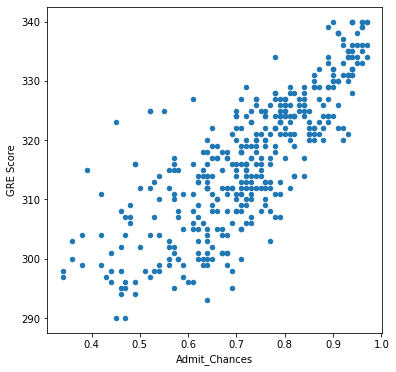

In [55]:
df.plot(kind='scatter', x='Admit_Chances', y='GRE Score', figsize=(6,6))

<AxesSubplot:xlabel='Admit_Chances', ylabel='University Rating'>

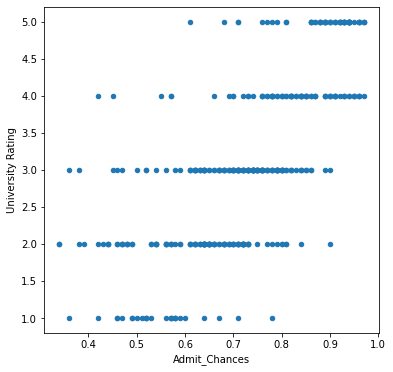

In [58]:
df.plot(kind='scatter', x='Admit_Chances', y='University Rating', figsize=(6,6))

Text(0, 0.5, 'Admit_Chances')

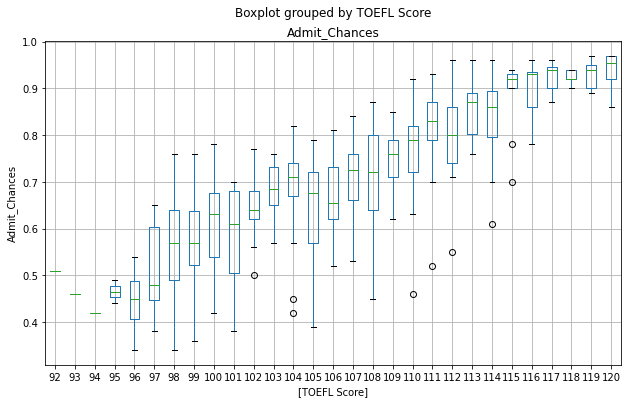

In [67]:
st = df[['Admit_Chances', 'TOEFL Score']].boxplot(by='TOEFL Score', figsize=(10,6))
st.set_ylabel('Admit_Chances')

CGPA                AxesSubplot(0.125,0.536818;0.227941x0.343182)
SOP              AxesSubplot(0.398529,0.536818;0.227941x0.343182)
TOEFL Score      AxesSubplot(0.672059,0.536818;0.227941x0.343182)
GRE Score              AxesSubplot(0.125,0.125;0.227941x0.343182)
Research            AxesSubplot(0.398529,0.125;0.227941x0.343182)
Admit_Chances       AxesSubplot(0.672059,0.125;0.227941x0.343182)
dtype: object

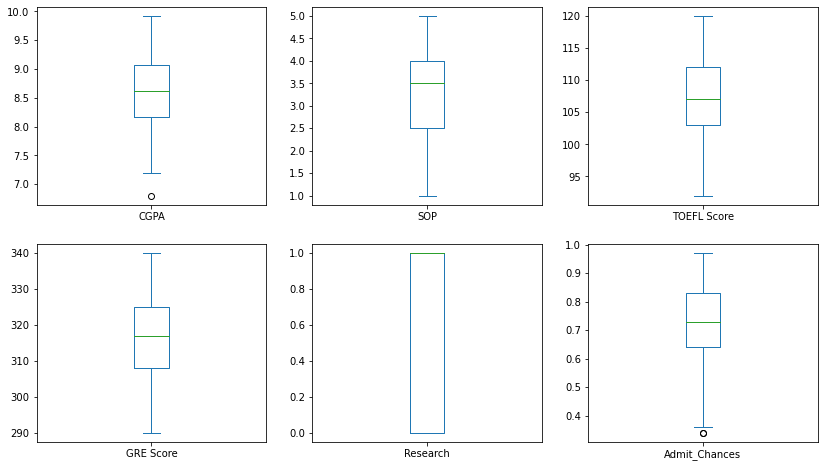

In [70]:
boxplot_cols = ['CGPA', 'SOP','TOEFL Score', 'GRE Score', 'Research', 'Admit_Chances']

df[boxplot_cols].plot(kind='box', subplots=True, layout=(2,3), figsize=(14,8))

LINEAR REGRESSION
DEFINE X AND Y

In [72]:
x=df.drop(['Admit_Chances'],axis=1).values
y= df['Admit_Chances'].values

In [74]:
print(x)

[[  1.   337.   118.   ...   4.5    9.65   1.  ]
 [  2.   324.   107.   ...   4.5    8.87   1.  ]
 [  3.   316.   104.   ...   3.5    8.     1.  ]
 ...
 [398.   330.   116.   ...   4.5    9.45   1.  ]
 [399.   312.   103.   ...   4.     8.78   0.  ]
 [400.   333.   117.   ...   4.     9.66   1.  ]]


In [75]:
print(y)

[0.92 0.76 0.72 0.8  0.65 0.9  0.75 0.68 0.5  0.45 0.52 0.84 0.78 0.62
 0.61 0.54 0.66 0.65 0.63 0.62 0.64 0.7  0.94 0.95 0.97 0.94 0.76 0.44
 0.46 0.54 0.65 0.74 0.91 0.9  0.94 0.88 0.64 0.58 0.52 0.48 0.46 0.49
 0.53 0.87 0.91 0.88 0.86 0.89 0.82 0.78 0.76 0.56 0.78 0.72 0.7  0.64
 0.64 0.46 0.36 0.42 0.48 0.47 0.54 0.56 0.52 0.55 0.61 0.57 0.68 0.78
 0.94 0.96 0.93 0.84 0.74 0.72 0.74 0.64 0.44 0.46 0.5  0.96 0.92 0.92
 0.94 0.76 0.72 0.66 0.64 0.74 0.64 0.38 0.34 0.44 0.36 0.42 0.48 0.86
 0.9  0.79 0.71 0.64 0.62 0.57 0.74 0.69 0.87 0.91 0.93 0.68 0.61 0.69
 0.62 0.72 0.59 0.66 0.56 0.45 0.47 0.71 0.94 0.94 0.57 0.61 0.57 0.64
 0.85 0.78 0.84 0.92 0.96 0.77 0.71 0.79 0.89 0.82 0.76 0.71 0.8  0.78
 0.84 0.9  0.92 0.97 0.8  0.81 0.75 0.83 0.96 0.79 0.93 0.94 0.86 0.79
 0.8  0.77 0.7  0.65 0.61 0.52 0.57 0.53 0.67 0.68 0.81 0.78 0.65 0.64
 0.64 0.65 0.68 0.89 0.86 0.89 0.87 0.85 0.9  0.82 0.72 0.73 0.71 0.71
 0.68 0.75 0.72 0.89 0.84 0.93 0.93 0.88 0.9  0.87 0.86 0.94 0.77 0.78
 0.73 

SPLIT THE DATA SET IN TRAINING SET AND TEST SET

In [79]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

TRAIN THE MODEL ON THE TRAINING SET


In [81]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

PREDICT THE TEST SET RESULTS

In [83]:
y_predict = lr.predict(x_test)
y_predict

array([0.6854095 , 0.71581608, 0.79926038, 0.61805808, 0.7242629 ,
       0.57736493, 0.70107968, 0.64873885, 0.87154637, 0.92432719,
       0.51025494, 0.87246855, 0.70062709, 0.47765461, 0.82436534,
       0.59690244, 0.64152801, 0.80691037, 0.5820035 , 0.73299054,
       0.87992147, 0.85549425, 0.64660036, 0.4719328 , 0.78647009,
       0.60114865, 0.48027319, 0.6147603 , 0.90536651, 0.63902726,
       0.62810949, 0.7537993 , 0.76791573, 0.55899743, 0.76175611,
       0.75139287, 0.6374612 , 0.85934991, 0.62422997, 0.96713477,
       0.70998559, 0.68584059, 0.67693462, 0.77295903, 0.84979107,
       0.63090875, 0.58517828, 0.70660331, 0.59940471, 0.60054017,
       0.67649725, 0.79172354, 0.65985516, 0.87554306, 0.73649531,
       0.77076998, 0.6902838 , 0.70042381, 0.73363763, 0.81036261,
       0.74639873, 0.47801858, 0.59846221, 0.54303989, 0.83748683,
       0.8471193 , 0.72731878, 0.84258435, 0.75562999, 0.76342208,
       0.56494007, 0.84017233, 0.80626106, 0.58357043, 0.91415

EVALUATE THE MODEL

In [89]:
r2_score(y_test,y_predict)

0.7665600669143438

PLOT THE RESULT

Text(0.5, 1.0, 'ACTUAL VERSUS PREDICTED ')

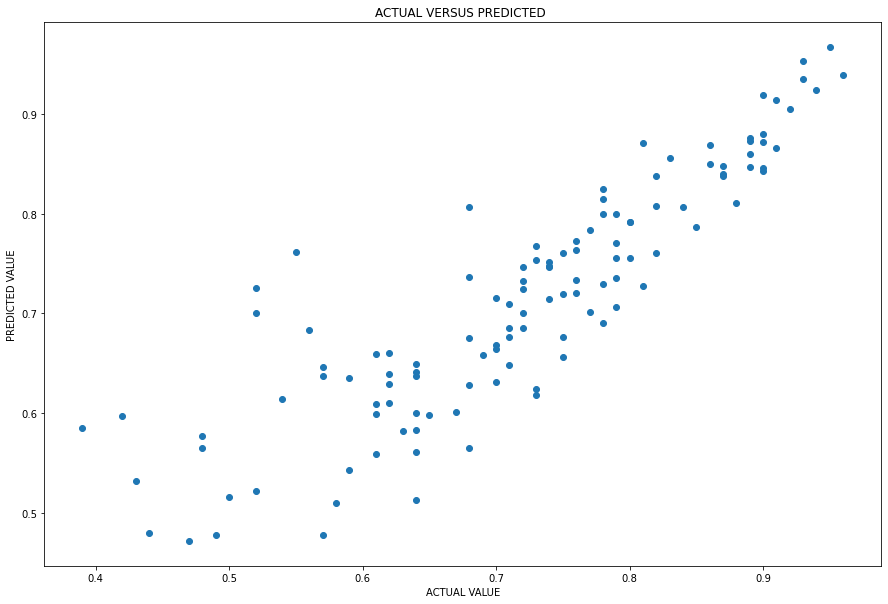

In [91]:
plt.figure(figsize=(15,10))
plt.scatter(y_test,y_predict)
plt.xlabel("ACTUAL VALUE")
plt.ylabel("PREDICTED VALUE")
plt.title("ACTUAL VERSUS PREDICTED ")

PREDICTED VALUES

In [96]:
predict_y_df=pd.DataFrame({'Actual Value':y_test,"predicted value":y_predict,"difference":y_test-y_predict})
predict_y_df[0:30]

,Actual Value,predicted value,difference
0,0.71,0.685410,0.024590
1,0.70,0.715816,-0.015816
2,0.79,0.799260,-0.009260
3,0.73,0.618058,0.111942
4,0.72,0.724263,-0.004263
5,0.48,0.577365,-0.097365
6,0.77,0.701080,0.068920
7,0.71,0.648739,0.061261
8,0.90,0.871546,0.028454
9,0.94,0.924327,0.015673
